In [1]:
from generator_based_on_Seattle import *

In [2]:
from parameters import *

In [3]:
generated_traffic_combined = generate_traffic_based_on_seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    constant_bitrate=IS_CONSTANT_BITRATE, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [4]:
generated_traffic_combined

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
23552576,5479.801741,8,10,100,5479.801741,5480.612129
23552577,5479.801817,10,4,100,5479.801817,5480.700793
23552578,5479.801878,2,11,100,5479.801878,5480.769033
23552579,5479.802009,9,11,100,5479.802009,5480.626662


In [5]:
generated_traffic = divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)

In [6]:
generated_traffic[0]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
12218,89.969152,9,3,100,89.969152,90.884465
12219,89.976985,4,1,100,89.976985,90.666468
12220,89.981666,7,6,100,89.981666,90.639551
12221,89.984750,3,7,100,89.984750,92.788174


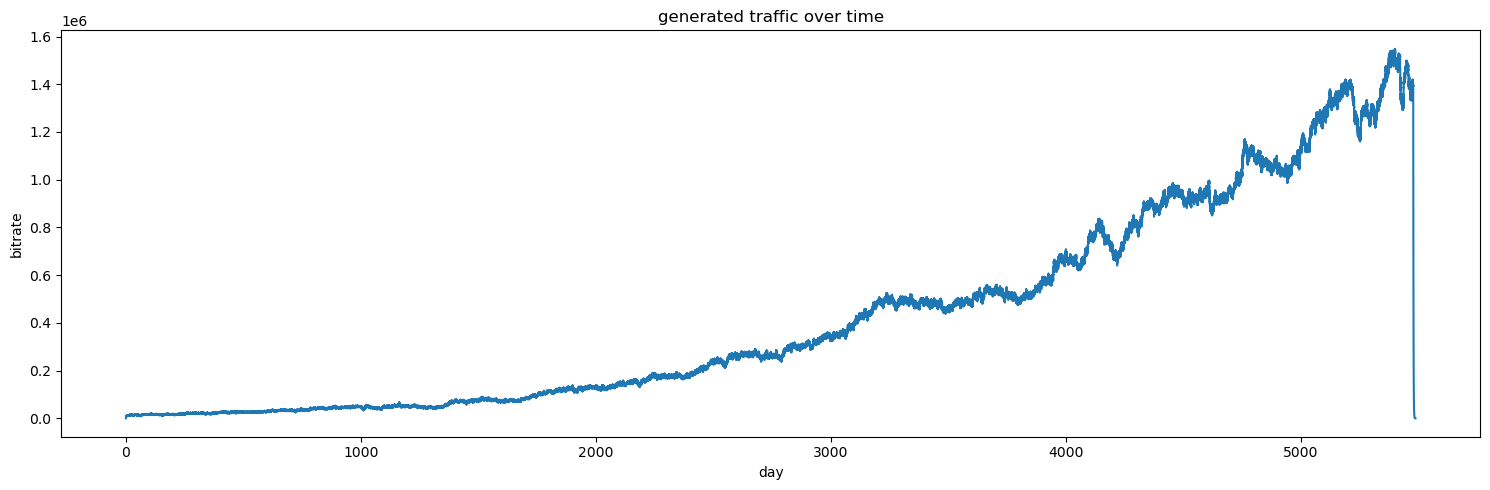

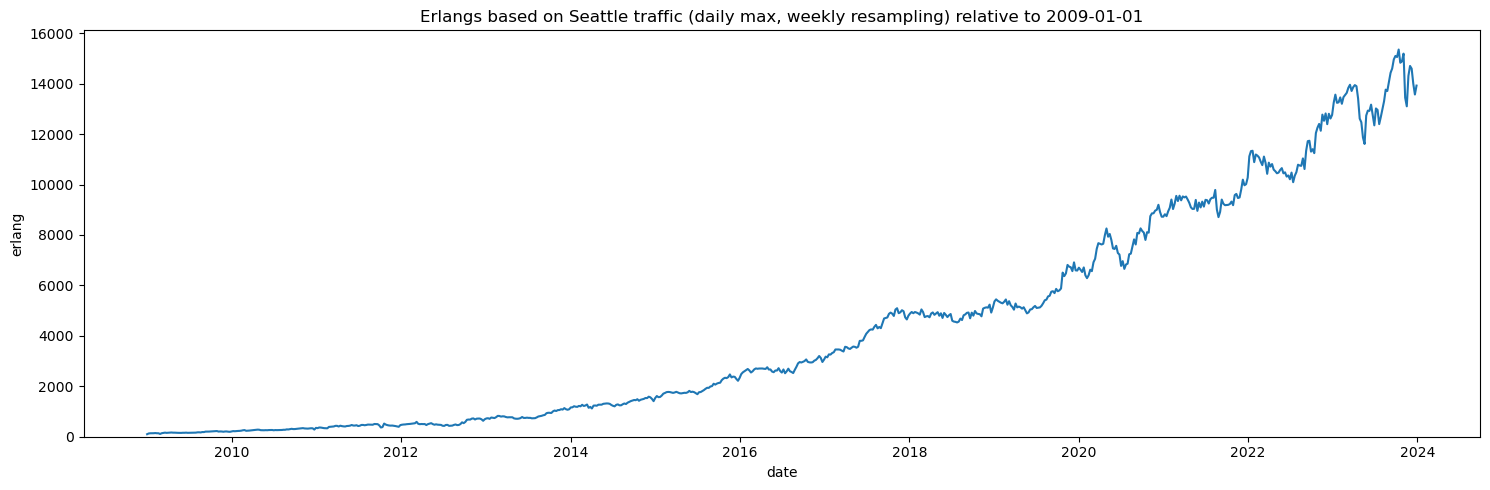

In [7]:
draw_generated_traffic(generated_traffic_combined)
draw_erlangs_from_Seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [8]:
predicted_traffic = perdict_traffic(generated_traffic_combined, constant_bitrate=IS_CONSTANT_BITRATE, period_length=UPGRADE_PERIOD, alpha=ALPHA_PERCENT)

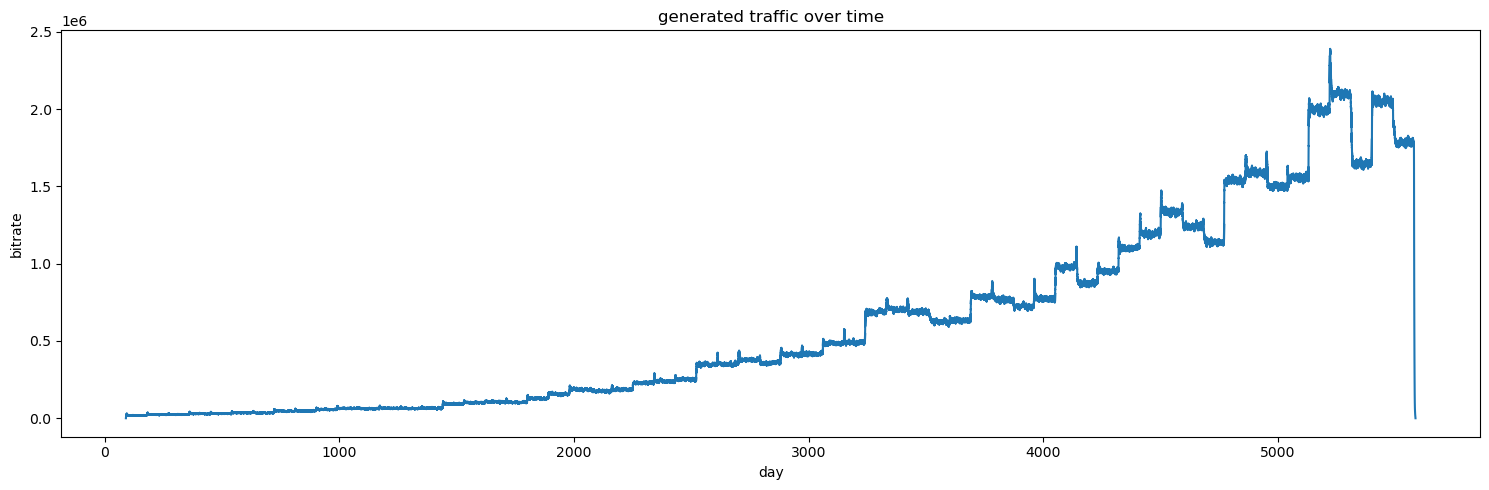

In [9]:
draw_generated_traffic(pd.concat(predicted_traffic))

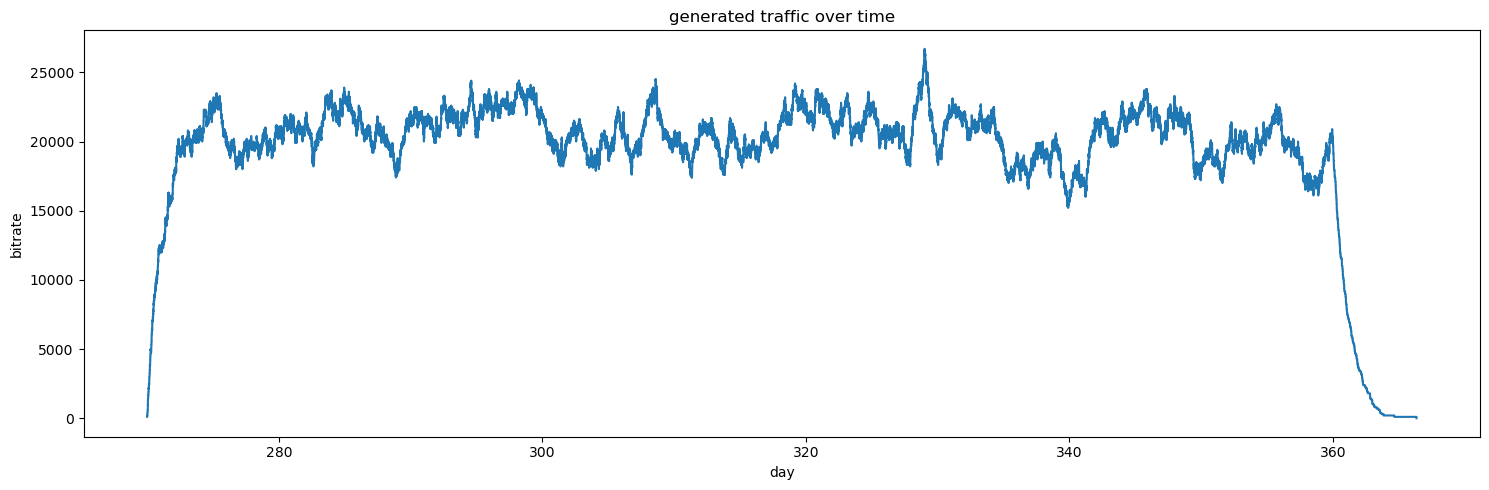

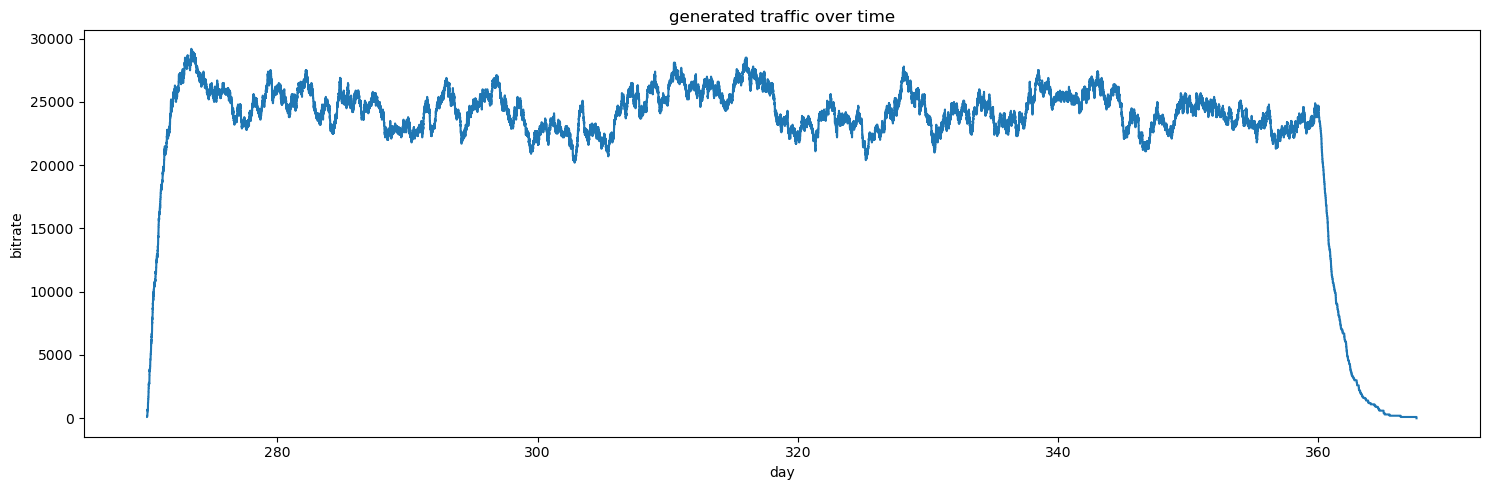

In [10]:
draw_generated_traffic(divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)[3])
draw_generated_traffic(predicted_traffic[2])

In [19]:
type(generated_traffic)

list

In [20]:
type(generated_traffic[0])

pandas.core.frame.DataFrame

In [21]:
len(generated_traffic)

61

In [22]:
type(predicted_traffic)

list

In [23]:
type(predicted_traffic[0])

pandas.core.frame.DataFrame

In [24]:
len(predicted_traffic)

61

In [29]:
generated_traffic[-1]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
22413605,5400.000026,7,0,100,5400.000026,5401.892609
22413606,5400.000163,3,9,100,5400.000163,5400.597181
22413607,5400.000164,3,0,100,5400.000164,5401.358913
22413608,5400.000259,0,4,100,5400.000259,5400.047033
22413609,5400.000307,7,8,100,5400.000307,5401.094514
...,...,...,...,...,...,...
23552576,5479.801741,8,10,100,5479.801741,5480.612129
23552577,5479.801817,10,4,100,5479.801817,5480.700793
23552578,5479.801878,2,11,100,5479.801878,5480.769033
23552579,5479.802009,9,11,100,5479.802009,5480.626662


In [26]:
predicted_traffic[0].iloc[len(predicted_traffic)]

current_global_time     90.370265
source_id                8.000000
destination_id          12.000000
datarate               100.000000
arrival_time            90.370265
departure_time          90.947401
Name: 61, dtype: float64

In [39]:
from pathlib import Path

folder_path: str = 'Load' + '_' + str(LAMBDA_0)
predicted_folder_path: str = folder_path + '/' + 'Predicted_Traffic'

Path(folder_path).mkdir(parents=True, exist_ok=True)
Path(predicted_folder_path).mkdir(parents=True, exist_ok=False)